# HK Model (unmodified)

## $d=1$

### 1. Density

In [2]:
from HKLnumerics import HK_1D, PlotFunctions

In [2]:
mu_U1 = HK_1D.create_mu_array(1000, 2)
mu_U8 = HK_1D.create_mu_array(1000, 8)

rho_U1 = HK_1D.create_rho_array(mu_U1, 2)
rho_U8 = HK_1D.create_rho_array(mu_U8, 8)

mus = [mu_U1, mu_U8]
rhos = [rho_U1, rho_U8]
labels = [r'$U=W/2$', r'$U=2W$']

Progress: 99.9%                    

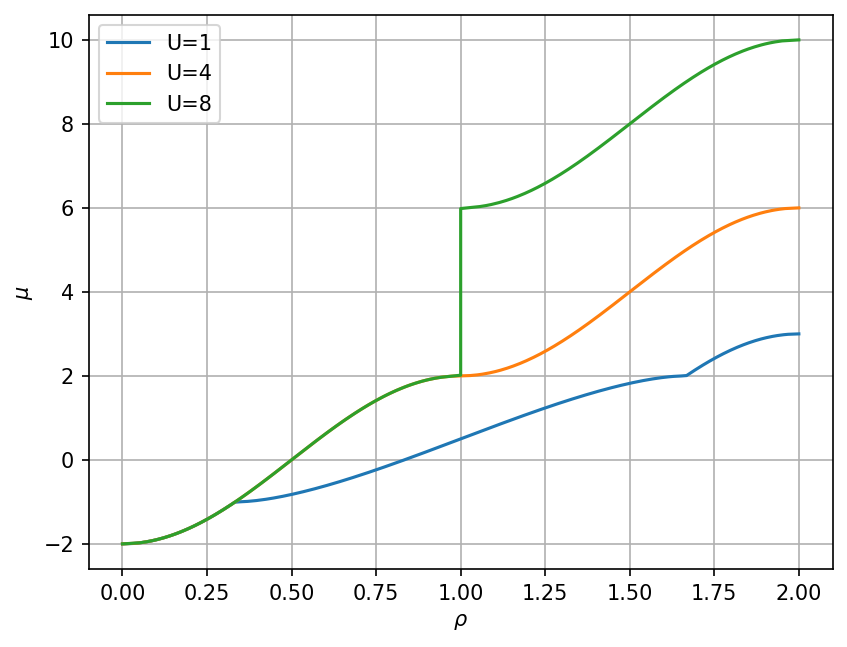

In [5]:
PlotFunctions.many_plots(labels, rhos, mus, r'$\rho$', r'$\mu$')

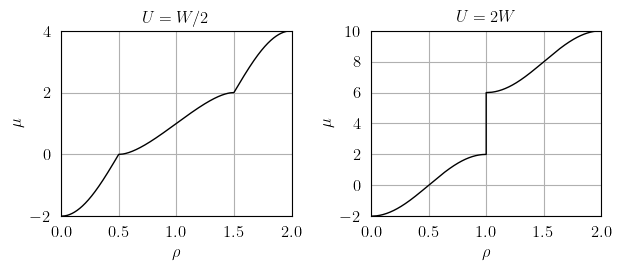

In [3]:
PlotFunctions.thesis_doubleplot_one_line(rhos, mus, r'$\rho$', r'$\mu$', labels, save_title='Plots/HK_mu_rho_weak_strong.pdf')

#### Interaction-driven Phase transition at constant density

In [9]:
import numpy as np

rho_const = 0.5
rho_string = r'$\rho$'
U_array = np.linspace(0, 5, 500)
mu_array_interaction = HK_1D.create_mu_array_interaction_driven(rho_const, U_array)

Progress: 99.8%                    

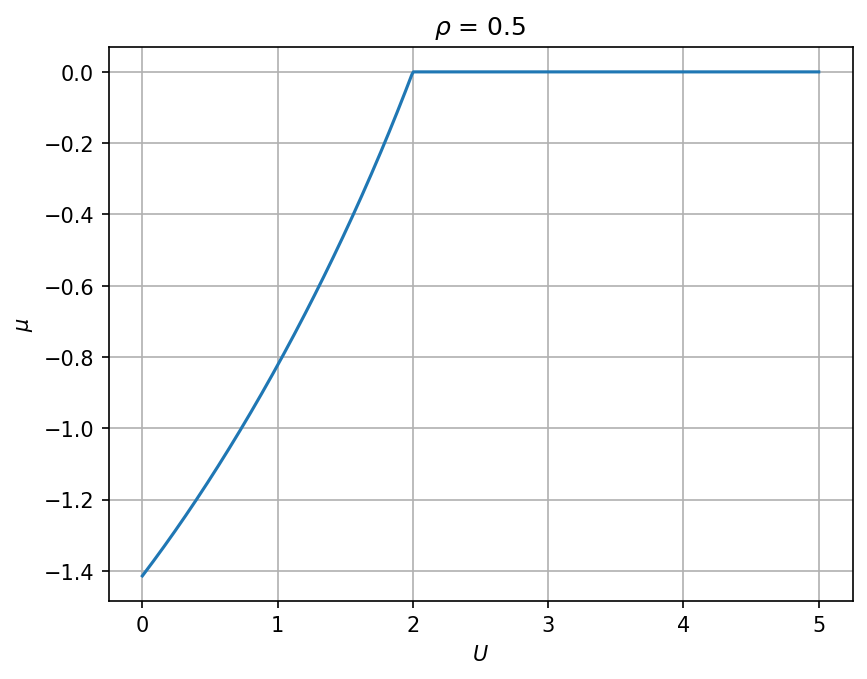

In [10]:
PlotFunctions.one_plot(U_array, mu_array_interaction, r'$U$', r'$\mu$', title=f'{rho_string} = {rho_const}')

Maybe continue with more values for density, plot them a t same time?

#### 3d-Plot

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000
U_vals = np.linspace(0, 8, N)

# build mu_grid: row i contains mu values for U = U_vals[i]
mu_grid = np.empty((N, N))
for i, U in enumerate(U_vals):
    mu_grid[i, :] = np.linspace(-2, 2 + U, N)

# build rho_grid: each row is the rho array computed for that row's mu and U
rho_grid = np.empty_like(mu_grid)
for i, U in enumerate(U_vals):
    rho_grid[i, :] = HK_1D.create_rho_array(mu_grid[i, :], U)   # shape (N,)

rho_grid_Uc = np.empty_like(rho_grid)
for i, U in enumerate(U_vals):
    for j in range(N):
        if U < 4 * np.square(np.sin(np.pi * rho_grid[i, j] / 2)):
            rho_grid_Uc[i, j] = rho_grid[i, j]
        else:
            rho_grid_Uc[i, j] = np.nan
    

# build U_grid as a 2D array where each row is the constant U value
U_grid = np.repeat(U_vals[:, None], N, axis=1)   # shape (N, N)

# (Optional) mask invalid values if create_rho_array may produce NaNs
rho_grid = np.ma.masked_invalid(rho_grid)



Progress: 2.2%                    

Progress: 99.9%                    

In [114]:
rho_grid_Uc = np.empty_like(rho_grid)
for i, U in enumerate(U_vals):
    for j in range(N):
        if U <= 4 * np.square(np.sin(np.pi * rho_grid[i, j] / 2)):
            rho_grid_Uc[i, j] = rho_grid[i, j]
        else:
            rho_grid_Uc[i, j] = np.nan

In [126]:
mask2 = (rho_grid > 1) | ~(np.isnan(rho_grid_Uc))
mask3 = (rho_grid < 1) | ~(np.isnan(rho_grid_Uc))
mask4 = (rho_grid != 1) | ~(np.isnan(rho_grid_Uc))
mask1 = ~(mask2 & mask3 & mask4)


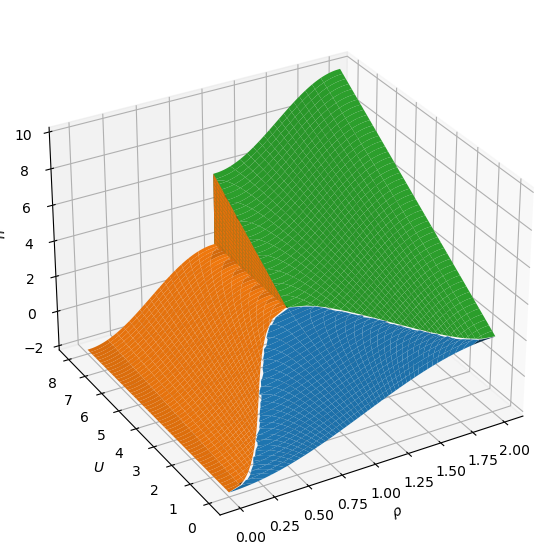

In [132]:
# --- Plot ---
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

#ax.plot_surface(rho_grid, U_grid, mu_grid, edgecolor='none', shade=True, zorder=1)

ax.plot_surface(
    np.ma.array(rho_grid, mask=mask1),
    np.ma.array(U_grid, mask=mask1),
    np.ma.array(mu_grid, mask=mask1),
    edgecolor='none', shade=True, zorder=1, antialiased=True
)

ax.plot_surface(
    np.ma.array(rho_grid, mask=mask2),
    np.ma.array(U_grid, mask=mask2),
    np.ma.array(mu_grid, mask=mask2),
    edgecolor='none', shade=True, zorder=2
)

ax.plot_surface(
    np.ma.array(rho_grid, mask=mask3),
    np.ma.array(U_grid, mask=mask3),
    np.ma.array(mu_grid, mask=mask3),
    edgecolor='none', shade=True, zorder=3
)

ax.plot_surface(
    np.ma.array(rho_grid, mask=mask4),
    np.ma.array(U_grid, mask=mask4),
    np.ma.array(mu_grid, mask=mask4),
    edgecolor='none', shade=True, zorder=4
)



ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$U$')
ax.set_zlabel(r'$\mu$')

ax.view_init(elev=30, azim=240)   # adjust viewing angle as desired
plt.show()

phase2 points: 356107
phase3 points: 356106
phase4 points: 94516


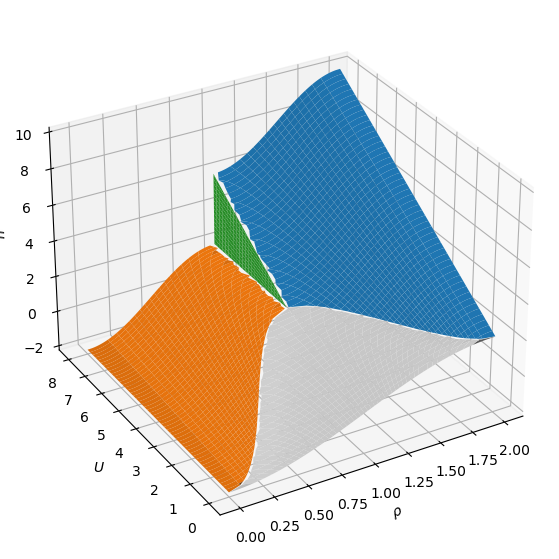

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# --- compute 'valid' region where rho_grid_Uc is NaN (your interesting points) ---
valid = np.isnan(rho_grid_Uc)            # True where you want to classify phases

# --- define phase booleans (visible where True) ---
phase2 = valid & (rho_grid < 1)                  # rho < 1
phase3 = valid & (rho_grid > 1)                  # rho > 1
phase4 = valid & np.isclose(rho_grid, 1, atol=1e-8)  # rho == 1 (use isclose)

# debug counts
print("phase2 points:", phase2.sum())
print("phase3 points:", phase3.sum())
print("phase4 points:", phase4.sum())

# --- masks for plotting (mask=True means "hide this point") ---
mask_phase2 = ~phase2   # hide everything except phase2
mask_phase3 = ~phase3
mask_phase4 = ~phase4

# mask the base where any phase exists (we WANT to hide the base there)
mask_base = phase2 | phase3 | phase4   # True where a phase will sit -> hide base

# --- Plot ---
fig = plt.figure(figsize=(10, 7))
ax  = fig.add_subplot(111, projection='3d')

# base (only shown where no phase exists)
ax.plot_surface(
    np.ma.array(rho_grid, mask=mask_base),
    np.ma.array(U_grid,   mask=mask_base),
    np.ma.array(mu_grid,  mask=mask_base),
    color='lightgray',
    linewidth=0,
    antialiased=True,
    shade=True
)

# phase 2
ax.plot_surface(
    np.ma.array(rho_grid, mask=mask_phase2),
    np.ma.array(U_grid,   mask=mask_phase2),
    np.ma.array(mu_grid,  mask=mask_phase2),
    color='tab:orange',
    linewidth=0,
    antialiased=True,
    shade=True
)

# phase 3
ax.plot_surface(
    np.ma.array(rho_grid, mask=mask_phase3),
    np.ma.array(U_grid,   mask=mask_phase3),
    np.ma.array(mu_grid,  mask=mask_phase3),
    color='tab:blue',
    linewidth=0,
    antialiased=True,
    shade=True
)

# (optional) phase 4
ax.plot_surface(
    np.ma.array(rho_grid, mask=mask_phase4),
    np.ma.array(U_grid,   mask=mask_phase4),
    np.ma.array(mu_grid,  mask=mask_phase4),
    color='tab:green',
    linewidth=0,
    antialiased=True,
    shade=True
)

ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$U$')
ax.set_zlabel(r'$\mu$')
ax.view_init(elev=30, azim=240)
plt.show()


Idea: I know curve of U_c in U-rho-plane. It should be bossible and not so hard to color mu values according to the phase, thereby highlighting phase transitions clearly.

### 2. Compressibility

In [11]:
kappa_U1 = HK_1D.create_kappa_array(mu_U1, 1)
kappa_U4 = HK_1D.create_kappa_array(mu_U4, 4)
kappa_U8 = HK_1D.create_kappa_array(mu_U8, 8)

kappas = [kappa_U1, kappa_U4, kappa_U8]

Progress: 99.9%                    

In [ ]:
PlotFunctions.one_plot(rho_U1, kappa_U1, r'$\rho$', r'$\kappa$')
PlotFunctions.one_plot(rho_U4, kappa_U4, r'$\rho$', r'$\kappa$')
PlotFunctions.one_plot(rho_U8, kappa_U8, r'$\rho$', r'$\kappa$')

### 3. Energy

In [17]:
energy_U1 = HK_1D.create_energy_array(mu_U1, 1)
energy_U4 = HK_1D.create_energy_array(mu_U4, 4)
energy_U8 = HK_1D.create_energy_array(mu_U8, 8)

energies = [energy_U1, energy_U4, energy_U8]

Progress: 99.9%                    

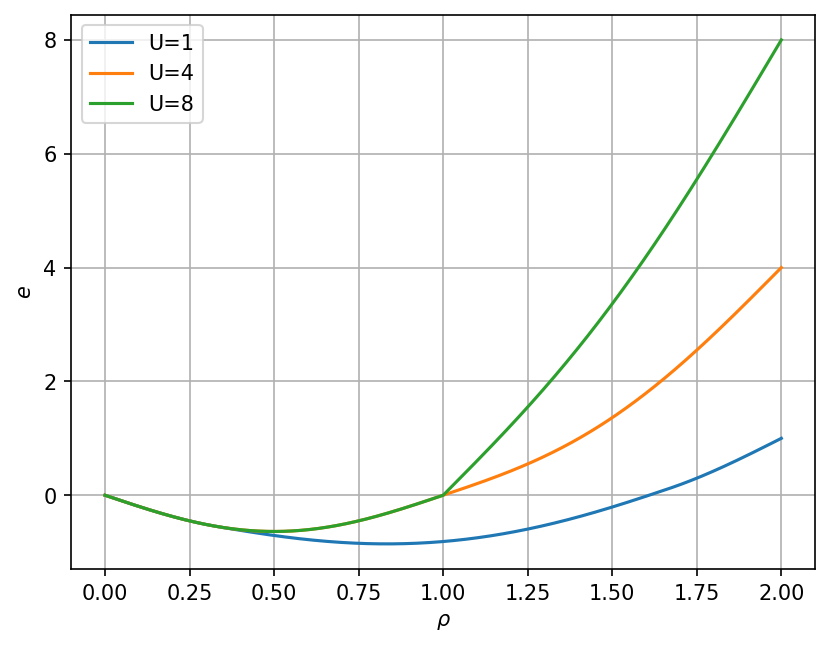

In [18]:
PlotFunctions.many_plots(labels, rhos, energies, r'$\rho$', r'$e$')

### Phase Diagram

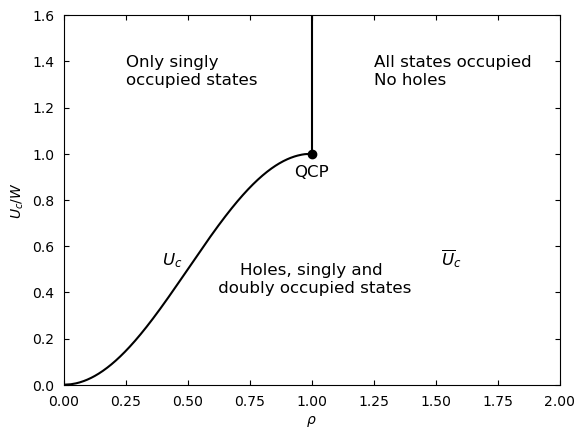

In [ ]:
from HKLnumerics import PhaseDiagram_1D
import numpy as np

rho_arr, Uc_arr = PhaseDiagram_1D.phase_diagram_hk(500)

Uc_arr_norm = Uc_arr / np.max(Uc_arr)

PlotFunctions.plot_phase_diagram(rho_arr, Uc_arr_norm, r'$\rho$', r'$U_c/W$', 1.6)

## $d=2$

In [1]:
from HKLnumerics import HK_2D, PlotFunctions
import numpy as np

str_rho = r'$\rho$'
str_mu = r'$\mu$'

In [ ]:
U_one_2d = 4

mu_2d_U_one = HK_2D.create_mu_array(100, U_one_2d)

rho_2d_U_one = HK_2D.create_rho_array(mu_2d_U_one, U_one_2d)

Progress: 99.0%                    

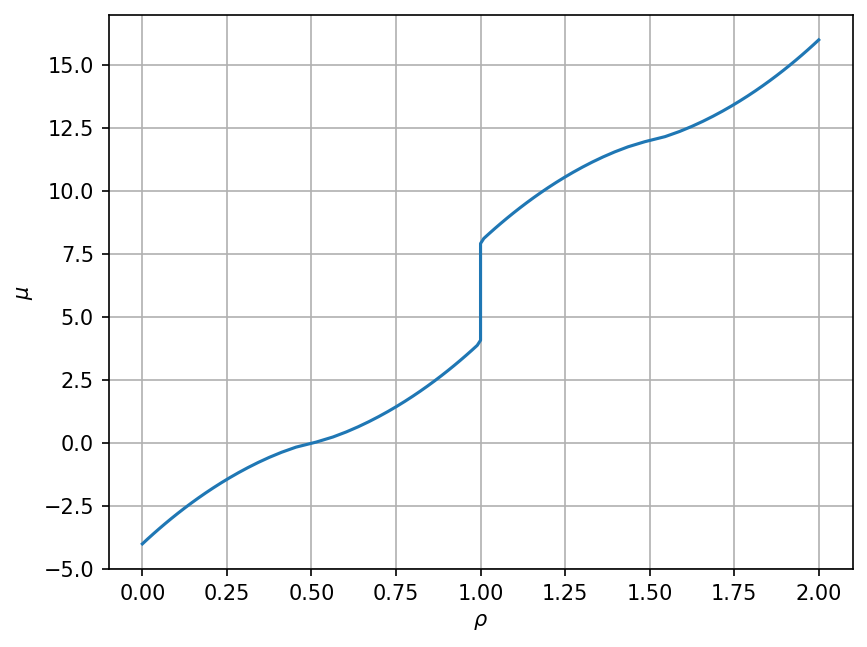

In [7]:
PlotFunctions.one_plot(rho_2d_U_one, mu_2d_U_one, str_rho, str_mu)